In [ ]:
!pip install qutip
!pip install cplot
!pip install matplotlib

from qutip import *
import numpy as np
import matplotlib.pyplot as plt
import scipy
import cplot as cplt
import matplotlib as mpl
from matplotlib import cm

from pylab import *
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
from scipy import integrate


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.0/28.0 MB 33.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 kB 2.9 MB/s eta 0:00:00


**Code 1**

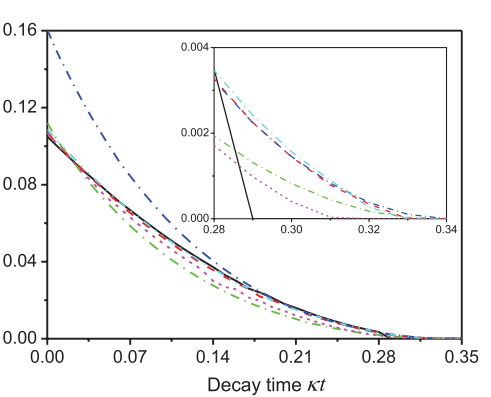

1.1.

به طور کلی قرار هست از تابع ویگنر روی فضای فاز انتگرال گرفته بشه و تحول زمانیش  دست بیاد و بعد دوباره از این ویگنر تحول یافته روی فضای فاز انتگرال بگیرم و کمیت دلتا دست بیاد.
خروجی نمودار کمیت دلنا هست بر حسب آهنگ اتلاف یعنی

ktaw.

اگر از ابتدای کار و از انتگرال اول کمیت آهنگ اتلاف رو به صورت بازه فلان مقدار تا فلان مقدار در نظر بگیرم، مشابه با کد پایین، خروجی نمودار نزولی خواهد بود ولیکن مقادیرش متفاوت هست با نمودار بالا که بایستی مطابق با اون باشه.

1.2.

حالا اگر کمیت آهنگ اتلاف رو در انتگرال اول بصورت یک متغیر تعریف کنم که انتگرال اول عددی دست نیاد و بشه ازش دوباره انتگرال گرفت، و بعد برای انتگرال دوم آهنگ اتلاف رو به صورت بازه ای تعریف کنم ، با ارور روبرو میشم که در دومین کد خدمتتون آوردم.


برای گرفتن دو تا انتگرال، آهنگ اتلاف باید بصورت عددی یا بصورت ابتدا متغیر در اانتگرال اول و بعد عددی در انتگرال دوم درنظر گرفته بشه؟ و آیا این روند کلی کدها درست هست؟

**1.1**

<ipython-input-2-1c7ace630bcf>:32: RuntimeWarning: divide by zero encountered in scalar divide
  W_integral = (2 / (T * (2 * n + 1))) * integrate.simps(integrate.simps(wigner_integrand(gamma_value, gamma, k_taw, W0, T, n), x), y)
<ipython-input-2-1c7ace630bcf>:30: RuntimeWarning: divide by zero encountered in scalar divide
  return (1 / np.pi) * np.exp((-2 / (T * (2 * n + 1))) * np.abs(ksi - gamma * np.exp(-k_taw))**2) * W0
<ipython-input-2-1c7ace630bcf>:30: RuntimeWarning: invalid value encountered in multiply
  return (1 / np.pi) * np.exp((-2 / (T * (2 * n + 1))) * np.abs(ksi - gamma * np.exp(-k_taw))**2) * W0
<ipython-input-2-1c7ace630bcf>:32: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  W_integral = (2 / (T * (2 * n + 1))) * integrate.simps(integrate.simps(wigner_integrand(gamma_value, gamma, k_taw, W0, T, n), x), y)
<ipython-input-2-1c7ace630bcf>:35: DeprecationWarning: 'scipy.integrate.simps

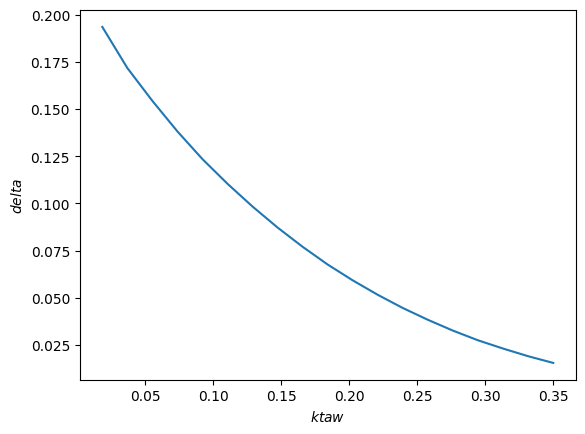

In [ ]:
N = 10
m = 6      # m=6, r=0.5, alpha=0.1 and n=0.01 --> for "green" curve
r = 0.5    # m=1, r=0.5, alpha=0.1 and n=0.01 --> for "black" curve
v = np.sqrt(1 - r**2)
alpha = 0.1
n = 0.01
k_taw_values = np.linspace(0, 0.35, 20)

a = qutip.destroy(N)
psi = (((v * a + r * a.dag())** m) * qutip.coherent(N, alpha)).unit()   # According to its definition

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
gamma = X + 1j * Y
# first step --> calculation of W(t=0)
W0 = qutip.wigner(psi, x, y)

delta_values = []

for k_taw in k_taw_values:
    T = 1 - np.exp(-2 * k_taw)   # According to its definition

    W = np.zeros_like(W0, dtype=complex)

    for i in range(len(x)):
        for j in range(len(y)):
            gamma_value = gamma[i, j]
              #2th __> calculation of W(t) : W(t)=(2 / (T * (2 * n + 1))) *
              # integral[(1 / np.pi) * np.exp((-2 / (T * (2 * n + 1))) * np.abs(ksi - gamma * np.exp(-k_taw))**2) * W0]
            def wigner_integrand(ksi, gamma, k_taw, W0, T, n):
                return (1 / np.pi) * np.exp((-2 / (T * (2 * n + 1))) * np.abs(ksi - gamma * np.exp(-k_taw))**2) * W0

            W_integral = (2 / (T * (2 * n + 1))) * integrate.simps(integrate.simps(wigner_integrand(gamma_value, gamma, k_taw, W0, T, n), x), y)
            W[i, j] = W_integral
    #3th --> calculaton of delta: delta = 0.5 * integral(|W(t)|-1)
    delta = 0.5 * (integrate.simps(integrate.simps(np.abs(W), x), y) - 1)
    delta_values.append(delta)

plt.plot(k_taw_values, delta_values)
plt.xlabel('$ktaw$')
plt.ylabel('$delta$')

plt.show()

**1.2**

In [ ]:
import sympy as sp
N = 10
r = 0.5
v = np.sqrt(1 - r**2)   # r^2 + v^2 = 1
m = 1
alpha = 0.1
n = 0.01


a = qutip.destroy(N)
psi = (((v * a + r * a.dag())** m) * qutip.coherent(N, alpha)).unit()   # According to its definition

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
gamma = X + 1j * Y   # gamma is a complex number in phase space.
W0 = qutip.wigner(psi, x, y)  # According to its definition

delta_values = []

W = np.zeros_like(W0, dtype=complex)

for i in range(len(x)):
  for j in range(len(y)):
    gamma_value = gamma[i, j]

    kt = sp.Symbol('kt')
    T = 1 - np.exp(-2 * kt)

    def wigner_integrand(ksi, gamma, W0, n):
      return  (1 / np.pi) * np.exp((-2 / (T * (2 * n + 1))) * np.abs(ksi - gamma * np.exp(-kt))**2) * W0
      W_integral = (-2 / (T * (2 * n + 1))) * sp.integrate(sp.integrate(wigner_integrand(gamma_value, gamma, W0, n), x), y)
      W[i, j] = W_integral


kt_values = np.linspace(0.01, 0.35, 100)

for kt in kt_values:
  delta = 0.5 * (sp.integrate(sp.integrate(np.abs(W), x), y) - 1)   # delta = 0.5 * integration (|W|-1)
  delta_values.append(delta)

plt.plot(kt_values, delta_values)
plt.xlabel('k$\tau$')
plt.ylabel('$\delta$')

plt.show()
print (W)

TypeError: loop of ufunc does not support argument 0 of type Mul which has no callable exp method